# Feature Selection I - Selecting for Feature Information

In this first out of two chapters on feature selection, you'll learn about the curse of dimensionality and how dimensionality reduction can help you overcome it. You'll be introduced to a number of techniques to detect and remove features that bring little added value to the dataset. Either because they have little variance, too many missing values, or because they are strongly correlated to other features.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

## The curse of dimensionality

As a data scientist, you'd rather have a dataset with a lot of features compared to one with just a few.

There is however one downside to high-dimensional datasets that you may not have considered thus far: models tend to overfit badly on high-dimensional data. 

The solution is to reduce dimensionality, but which features should you drop? In this chapter we'll look into detecting low quality features and how to remove them.

But first, we'll build some intuition on why models overfit. 

### From observation to pattern

Say we want to predict the city in which a house is located based on some features of that house. But all we have to train the model is this tiny dataset with the house price in million Euros for two observations.

| City | Price |
|------|:-----:|
| Berlin | 2 |
| Paris | 3 |

The model will overfit. It will just memorize the two training examples instead of deriving a general pattern for houses from each city. If we want the model to generalize we need to give it more observations of house prices for each city. 

When we expand to 1000 observations per city the price distributions become clear and a model should be able to train on this data without overfitting. 

| City | Price |
|------|:-----:|
| Berlin | 2.0 |
| Berlin | 3.1 |
| Berlin | 4.3 |
| Paris | 3.0 |
| Paris | 5.2 |
| ... | ... |


![alt text](images/observation_to_pattern.png)

### Building a city classifier

To test this assumption we'll build a model. But before we do so, we'll split the data into a 70% train and 30% test set using scikit learn's `train_test_split()` function. 

```python
# separate the feature we want to predict from the ones to train the model on
y = house_df['City']

X = house_df.drop('City', axes=1)

# perform a 70/30 train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
```

We'll then instantiate a classifier model, here we chose a support vector machine classifier, and fit it to the training data. 

```python
# create Support Vector Machine Classifier and fit
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)
```

We can then assess the accuracy of the model on the test set, this is the 30% of the original data that the model didn't see during the training process.

```python
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, svc.predict(X_test)))
```

```text
0.826
```

Our model is able to assign 82.6% of unseen houses to the correct city.

From our visual exploration, this could be expected since there was quite a lot of overlap in the single feature our model was trained on (price).

If we want to know whether our model overfitted to the dataset we can have a look at the accuracy on the training set. If this accuracy is much higher than that on the test set we can conclude that the model didn't generalize well but simply memorized all training examples.

```python
print(accuracy_score(y_train, svc.predict(X_train)))
```

```text
0.832
```

Fortunately, this is not the case here. 

### Adding features

If we want to improve the accuracy of our model, we'll have to add features to the dataset.

Features like number of floors, bathrooms, or square area could all be helpful.

| City | Price | n_floors | n_bathroom | surface_m2 |
|------|:-----:|:--------:|:----------:|:----------:|
| Berlin | 2.0 | 1 | 1 | 190 |
| Berlin | 3.1 | 2 | 1 | 187 |
| Berlin | 4.3 | 2 | 2 | 240 |
| Paris | 3.0 | 2 | 1 | 170 |
| Paris | 5.2 | 2 | 2 | 290 |
| ... | ... | ... | ...| ... |

However, with each feature that we add, we should also increase the number of observations of houses in our dataset. If we don't we'll end up with a lot of unique combinations of features that models can easily memorize and thus overfit to.

In fact, to avoid overfitting ***the number of observations should increase exponentially with the number of features***. Since this becomes really problematic for high dimensional datasets this phenomenon is known as the curse of dimensionality.

The solution to this is of course to apply dimensionality reduction. 

#### Train - test split

In this chapter, you will keep working with the ANSUR dataset. Before you can build a model on your dataset, you should first decide on which feature you want to predict. In this case, you're trying to predict gender.

You need to extract the column holding this feature from the dataset and then split the data into a training and test set. The training set will be used to train the model and the test set will be used to check its performance on unseen data.

`ansur_df` has been pre-loaded for you.

##### Instructions

* Import the `train_test_split` function from `sklearn.model_selection`.
* Assign the `'Gender'` column to `y`.
* Remove the `'Gender'` column from the DataFrame and assign the result to `X`.
* Set the test size to 30% to perform a 70% train and 30% test data split.

In [2]:
ansur_df = pd.read_csv("data/ansur_male_female_2.csv")

In [4]:
y = ansur_df["Gender"]
X = ansur_df.drop("Gender", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(f"{X_test.shape[0]} rows in test set vs. {X_train.shape[0]} in training set, {X_test.shape[1]} Features.")

60 rows in test set vs. 140 in training set, 92 Features.


#### Fitting and testing the model

In the previous exercise, you split the dataset into `X_train`, `X_test`, `y_train`, and `y_test`. These datasets have been pre-loaded for you. You'll now create a support vector machine classifier model (`SVC()`) and fit that to the training data. You'll then calculate the accuracy on both the test and training set to detect overfitting.

##### Instructions

* Import `SVC` from `sklearn.svm` and `accuracy_score` from `sklearn.metrics`
* Create an instance of the Support Vector Classification class (`SVC()`).
* Fit the model to the training data.
* Calculate accuracy scores on both train and test data.

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc = SVC()

svc.fit(X_train, y_train)

accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print(f"{accuracy_test:.1%} accuracy on test set vs. {accuracy_train:.1%} on training set")

95.0% accuracy on test set vs. 95.0% on training set


Site returned "81.7% accuracy on test set vs. 88.6% on training set" which was considered overtraining.

#### Accuracy after dimensionality reduction

You'll reduce the overfit with the help of dimensionality reduction. In this case, you'll apply a rather drastic form of dimensionality reduction by only selecting a single column that has some good information to distinguish between genders. You'll repeat the train-test split, model fit and prediction steps to compare the accuracy on test versus training data.

All relevant packages and `y` have been pre-loaded.

##### Instructions

* Select just the neck circumference (`'neckcircumferencebase'`) column from `ansur_df`.
* Split the data, instantiate a classifier and fit the data. This has been done for you.
* Once again calculate the accuracy scores on both training and test set.

In [34]:
# Assign just the 'neckcircumferencebase' column from ansur_df to X
X = ansur_df[["neckcircumferencebase"]]
y = ansur_df["Gender"]

# Split the data, instantiate a classifier and fit the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
svc = SVC()
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print(f"{accuracy_test:.1%} accuracy on test set vs. {accuracy_train:.1%} on training set")

96.7% accuracy on test set vs. 94.3% on training set


Site got "95.0% accuracy on test set vs. 95.0% on training set".

## Features with missing values or little variance

In this lesson, we'll automate the selection of features that have sufficient variance and not too many missing values. 

### Creating a feature selector

**Note:** Finally got a version of the ANSUR data that *almost* matches what the site is using for demos. `ansur_all.csv` has 6068 rows but 108(!) columns (14 more than the site's).

Low variance features are so similar between different observations that they may contain little information you can use in an analysis.

To remove them, we can use one of Scikit-learn's built-in feature selection tools called `VarianceThreshold()`. When we create the selector we can set the minimal variance threshold. Here, we've set it to a variance of one. After fitting the selector to our dataset, its `.get_support()` method will give us a `True` or `False` value on whether each feature's variance is above the threshold or not. We call this type of boolean array a mask, and we can use this mask to reduce the number of dimensions in our dataset using `.loc()`.

In [14]:
from sklearn.feature_selection import VarianceThreshold

ansur_df = pd.read_csv("data/ansur_all_numeric.csv")

print(ansur_df.shape)

sel = VarianceThreshold(threshold=1)
sel.fit(ansur_df)

mask = sel.get_support()

reduced_df = ansur_df.loc[:, mask]
print(reduced_df.shape)

(6068, 99)
(6068, 98)


### Variance selector caveats

One problem with variance thresholds is that variance values aren't always easy to interpret or compare between features. We can illustrate this by looking at a number of buttock features from our ANSUR dataset. In the boxplot you can see that these different measurements have different medians, the green horizontal lines in each blue rectangle, and variances, the height of the blue rectangles and the length of the vertical lines coming from them. 

![alt text](images/buttocks_boxplot.png)

For this dataset higher values tend to have higher variances and we should therefore normalize the variance before using it for feature selection. 

### Normalizing the variance

Divide each column by its mean value before fitting the selector. After normalization, the variance in the dataset will be lower. We therefore also reduced the variance threshold to 0.005. Make sure to inspect your data visually while setting this value. When we apply the selector to our dataset the number of features is more than halved, to 45. 

In [15]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=0.005)
sel.fit(ansur_df / ansur_df.mean())

mask = sel.get_support()

reduced_df = ansur_df.loc[:, mask]
print(reduced_df.shape)

(6068, 49)


### Missing value selector

Another reason you might want to drop a feature is that it contains a lot of missing values. 

```python
# get total number of missing values in each column
pokemon_df.isna().sum()
```

```text
Name          0
Type 1        0
Type 2      386
Total         0
HP            0
Attack        0
Defense       0
dtype: float64
```

Divide this number by the total number of rows in the DataFrame to get the ratio of missing values. It turns out that almost half the Pokemon don't have a value for the Type 2 feature. 

```python
pokemon_df.isna().sum() / len(pokemon_df)
```

```text
Name       0.00
Type 1     0.00
Type 2     0.48
Total      0.00
HP         0.00
Attack     0.00
Defense    0.00
dtype: float64
```

### Applying a missing value threshold

Based on this ratio we can create a mask for features that have fewer missing values than a certain threshold. In this case, we set it to 0.3. Once again we can pass our mask to the `.loc[]` method to sub-select the columns. The Type 2 feature is gone now. 

```python
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=0.005)
sel.fit(ansur_df / ansur_df.mean())

# fewer than 30% missing = True
mask = pokemon_df.isna().sum() / len(pokemon_df) < 0.3

reduced_df = ansur_df.loc[:, mask]
```

When features have some missing values, but not too much, we could apply *imputation* to fill in the blanks.

#### Finding a good variance threshold

You'll be working on a slightly modified subsample of the ANSUR dataset with just head measurements pre-loaded as `head_df`.

##### Instructions 1/4

* Create a boxplot on head_df.

In [3]:
# setup
head_df = pd.read_csv("data/head.csv")

<Axes: >

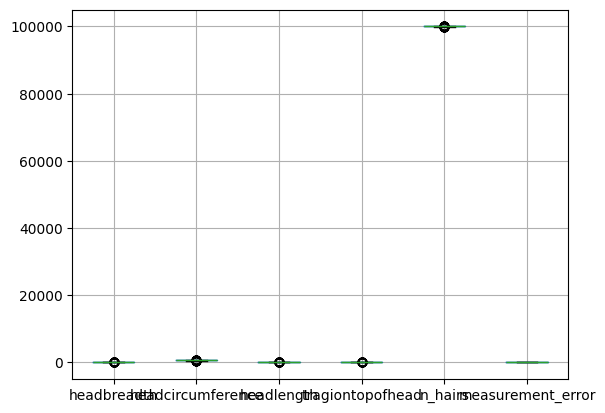

In [4]:
head_df.boxplot()

##### Instructions 2/4

* Normalize the data by dividing the DataFrame with its mean values.

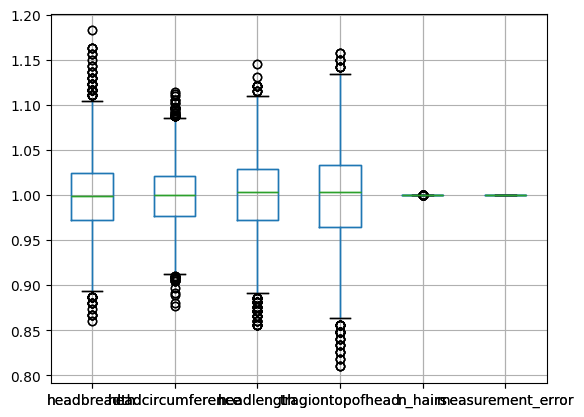

In [7]:
normalized_df = head_df / head_df.mean()
normalized_df.boxplot()
plt.show()

##### Instructions 3/4

* Print the variances of the normalized data.

In [8]:
normalized_df.var()

headbreadth          1.678952e-03
headcircumference    1.029623e-03
headlength           1.867872e-03
tragiontopofhead     2.639840e-03
n_hairs              1.002552e-08
measurement_error    0.000000e+00
dtype: float64

##### Instructions 4/4

**Question**

Inspect the printed variances. If you want to remove the 2 very low variance features. What would be a good variance threshold?

**Possible answers**

1. 1.5e-03
2. 1.5e-02
3. 1.0e-03
4. 1.0e-02

**Answer**

3. 1.0e-03

### Features with low variance

In the previous exercise you established that 0.001 is a good threshold to filter out low variance features in `head_df` after normalization. Now use the `VarianceThreshold` feature selector to remove these features.
##### Instructions

* Create the variance threshold selector with a threshold of 0.001.
* Normalize the `head_df` DataFrame by dividing it by its mean values and fit the selector.
* Create a boolean mask from the selector using `.get_support()`.
* Create a reduced DataFrame by passing the mask to the `.loc[]` 

In [9]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=0.001)
sel.fit(head_df / head_df.mean())
mask = sel.get_support()
reduced_df = head_df.loc[:, mask]

print(f"Dimensionality reduced from {head_df.shape[1]} to {reduced_df.shape[1]}.")

Dimensionality reduced from 6 to 4.


### Removing features with many missing values

You'll apply feature selection on the Boston Public Schools dataset which has been pre-loaded as `school_df`. Calculate the missing value ratio per feature and then create a mask to remove features with many missing values.

##### Instructions 1/2

**Question**

In what range lies highest ratio of missing values for a single feature in the dataset?

1. Between 0.9 and 1.0.
2. Between 0.8 and 0.9.
3. Between 0.7 and 0.8.
4. Between 0.6 and 0.7.

**Answer**

1. Between 0.9 and 1.0.

In [13]:
school_df = pd.read_csv("data/school.csv")

school_df.isna().sum() / len(school_df)

x             0.000000
y             0.000000
objectid_1    0.000000
objectid      0.000000
bldg_id       0.000000
bldg_name     0.000000
address       0.000000
city          0.000000
zipcode       0.000000
csp_sch_id    0.000000
sch_id        0.000000
sch_name      0.000000
sch_label     0.000000
sch_type      0.000000
shared        0.877863
complex       0.984733
label         0.000000
tlt           0.000000
pl            0.000000
point_x       0.000000
point_y       0.000000
dtype: float64

##### Instructions 2/2

* Create a boolean mask on whether each feature has less than 50% missing values.
* Apply the mask to `school_df` to select columns without many missing values.

In [16]:
mask = (school_df.isna().sum() / len(school_df)) < 0.5
reduced_df = school_df.loc[:, mask]

print(school_df.shape)
print(reduced_df.shape)

(131, 21)
(131, 19)


## Pairwise correlation

In the last two lessons, we focused on techniques to remove features based on their individual properties, such as the variance they show or the proportion of missing values they have.

A next step is to look at how features relate to one another to decide if they are worth keeping. 

Remember, pairplots help us visually identify strongly correlated features. They do **not** help us quantify the correlation, though.

### Correlation coefficient

The correlation coefficient is a measure of the strength of the correlation between features.

![alt text](images/correlation_coefficient.png)

Minus one describes a perfectly negative correlation, zero describes no correlation at all and plus one stands for a perfect positive correlation. 

When the relation between two features shows more variance, as is usually the case in real-world data, the correlation coefficients will be a bit closer to zero. 

![alt text](images/realistic_correlation_coefficient.png)

### Correlation matrix

We can calculate correlation coefficients on pandas DataFrames using the `.corr()` method. Doing so generates a correlation matrix.

```python
weights_df.corr()
```

![alt text](images/correlation_matrix.png)

Perfectly correlated features such as weight in kilograms and weight in pounds have a correlation coefficient of 1.

### Visualizing the correlation matrix

We can visualize correlation matrices using Seaborn's `heatmap()` function.

```python
cmap = sns.diverging_palette(h_neg=10, h_pos=240, as_cmap=True)

sns.heatmap(weights_df.corr(), center=0, cmap=cmap, linewidths=1, annot=True, fmt=".2f")
```

![alt text](images/correlation_heatmap.png)

We can improve this plot by removing the diagonal values that show each feature perfectly correlates to itself and the duplicated values as well.

To do so we'll create a boolean mask. We use NumPy's `ones_like()` function to create a matrix filled with True values with the same dimensions as our correlation matrix and then pass this to NumPy's `triu()`, for triangle upper, function to set all non-upper triangle values to False. When we pass this mask to the `heatmap()` function it will ignore the upper triangle, allowing us to focus on the interesting part of the plot. 

```python
corr = weights_df.corr()

mask = np.triu(no.ones_like(corr, dtype=bool))

sns.heatmap(weights_df.corr(), mask=mask, center=0, cmap=cmap, linewidths=1, annot=True, fmt=".2f")
```

![alt text](images/better_heatmap.png)

When we apply this method to a slightly larger subset of the ANSUR data we can instantly spot that chest height is not correlated to the hip breadth while sitting, and that the suprasternale height is very strongly correlated to the chest height. 

![alt text](images/ansur_heatmap.png)

#### Correlation intuition

What statement on correlations is correct?

**Possible Answers**

1. The correlation coefficient of A to B is equal to that of B to A.
2. When two features have a correlation coefficient of 1 the values of both features are equal for each observation.
3. A correlation coefficient of 0 between two features A and B implies that high values of A are typically associated with low values of B.

**Answer**

1. The correlation coefficient of A to B is equal to that of B to A.

#### Inspecting the correlation matrix

A sample of the ANSUR body measurements dataset has been pre-loaded as `ansur_df`. Use the terminal to create a correlation matrix for this dataset.

What is the correlation coefficient between wrist and ankle circumference?

##### Instructions

**Possible answers**

1. 0.702
2. 1.000
3. 0.302
4. 0.577

**Answer**

1. 0.702

In [5]:
ansur_df = pd.read_csv("data/correlation_matrix_ansur_data.csv")

ansur_df.corr()

,Elbow rest height,Wrist circumference,Ankle circumference,Buttock height,Crotch height
Elbow rest height,1.000000,0.294753,0.301963,-0.007013,-0.026090
Wrist circumference,0.294753,1.000000,0.702178,0.576679,0.606582
Ankle circumference,0.301963,0.702178,1.000000,0.367548,0.386502
Buttock height,-0.007013,0.576679,0.367548,1.000000,0.929411
Crotch height,-0.026090,0.606582,0.386502,0.929411,1.000000


#### Visualizing the correlation matrix

Reading the correlation matrix of `ansur_df` in its raw, numeric format doesn't allow us to get a quick overview. Let's improve this by removing redundant values and visualizing the matrix using seaborn.

Seaborn has been pre-loaded as `sns`, matplotlib.pyplot as `plt`, NumPy as `np` and pandas as `pd`.

##### Instructions 1/4

* Create the correlation matrix.
* Visualize it using Seaborn's heatmap function.

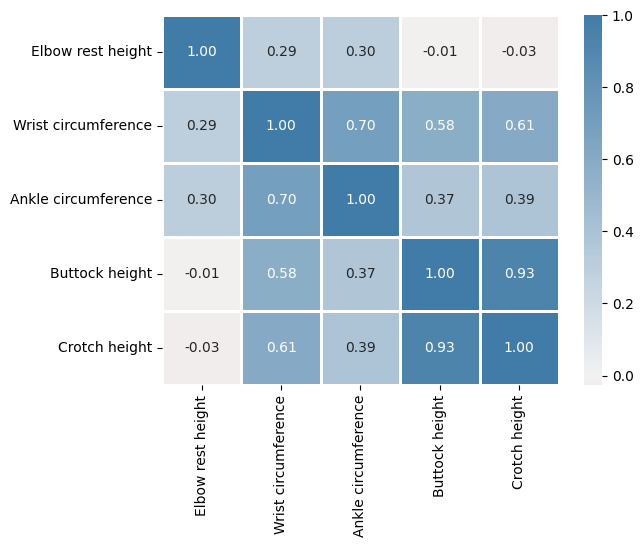

In [6]:
corr = ansur_df.corr()

cmap = sns.diverging_palette(h_neg=10, h_pos=240, as_cmap=True)

sns.heatmap(corr, center=0, cmap=cmap, linewidths=1, annot=True, fmt=".2f")

plt.show()

##### Instructions 2/4

* Create a boolean mask for the upper triangle of the plot.

In [7]:
mask = np.triu(np.ones_like(corr, dtype=bool))

print(mask)

[[ True  True  True  True  True]
 [False  True  True  True  True]
 [False False  True  True  True]
 [False False False  True  True]
 [False False False False  True]]


##### Instructions 3/4

* Add the mask to the heatmap.

<Axes: >

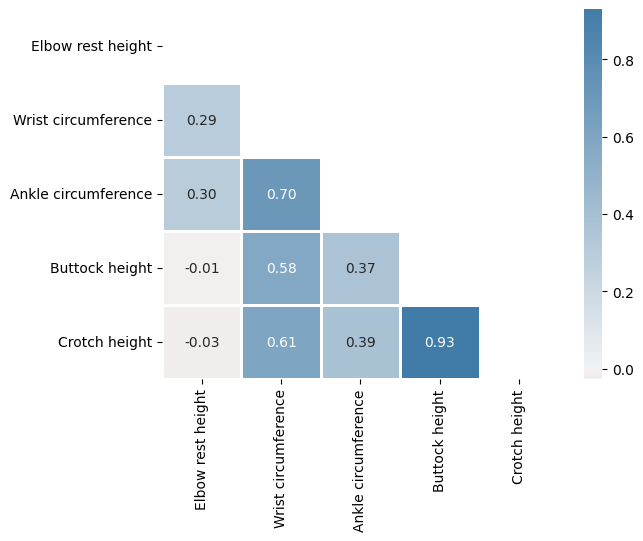

In [8]:
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, linewidths=1, annot=True, fmt=".2f")

##### Instructions 4/4

**Question**

Which two features have the strongest correlation?

**Possible answers**

1. Wrist circumference and Ankle circumference.
2. Crotch height and Elbow rest height.
3. Wrist circumference and Buttock height.
4. Buttock height and Crotch height.

**Answer**

4. Buttock height and Crotch height.

## Removing highly correlated features

Features that are perfectly correlated to each other, with a correlation coefficient of one or minus one, bring no new information to a dataset but do add to the complexity. 

Naturally, we would want to drop one of the two features that hold the same information.

In addition to this we might want to drop features that have correlation coefficients close to one or minus one if they are measurements of the same or similar things. 

### Highly correlated data

The ANSUR dataset there are measurements for suprasternale, cervicale and chest height. The suprasternale and cervicale are two bones in the chest region so these three measurements always have very similar values. We see correlation as high as 98% so it makes sense to keep only one (for simplicity;s sake and to avoid overfitting the model on insignificant differences).

### Removing highly correlated features

First create a correlation matrix and take the absolute values of that, to also filter out strong negative correlations. Then create a mask for the upper triangle of the dataset just like we did when we were visualizing the correlation matrix. When we pass this mask to the pandas DataFrame .mask() method it will replace all positions in the DataFrame where the mask has a True value with NA.

```python
# create correlation matrix
corr_df = chest_df.corr().abs()

mask = np.triu(np.ones_like(corr, dtype=bool))
tri_df = corr_df.mask(mask)
```

We can then find all columns that have a correlation to any feature stronger than a given threshold value. We used the mask to set half of the matrix to NA values is that we want to avoid removing both features when they have a strong correlation. 

```python
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.95)]

print(to_drop)
```

```text
['Suprasternale height', 'Cervicale height']
```

Finally we drop the selected features from the DataFrame with the `.drop()` method. 

```python
reduced_df = chest_df.drop(to_drop, axis=1)
```

### Feature extraction as an alternative

The method we just discussed is a bit of a brute force approach that should only be applied if you have a good understanding of the dataset. If you're unsure whether removing highly correlated features will remove important information from the data but still need to reduce dimensionality, you could consider feature extraction techniques.

### Correlation caveats - Anscombe's quartet

What's important to know about correlation coefficients is that they can produce weird results when the relation between two features is non-linear or when outliers are involved. 

For example, the four datasets displayed here, known as **Anscombe's quartet**, all have the same correlation coefficient of 0.82. To avoid unpleasant surprises like this, make sure you visually check your data early on. 

![alt text](images/anscombes_quartet.png)

### Correlation caveats - causation

A final thing to know about strong correlations is that they do not imply causation.

In this example dataset, the number of firetrucks sent to a fire is correlated to the number of people wounded by that fire. Concluding that the higher number of wounded people is caused by sending more firetrucks would be wrong and even dangerous if used as a reason to send fewer trucks in the future. 

![alt text](images/firetrucks_vs_wounded.png)

#### Filtering out highly correlated features

You're going to automate the removal of highly correlated features in the numeric ANSUR dataset. You'll calculate the correlation matrix and filter out columns that have a correlation coefficient of more than 0.95 or less than -0.95.

Since each correlation coefficient occurs twice in the matrix (correlation of A to B equals correlation of B to A) you'll want to ignore half of the correlation matrix so that only one of the two correlated features is removed. Use a mask trick for this purpose.

##### Instructions

* Calculate the correlation matrix of `ansur_df` and take the absolute value of this matrix.
* Create a boolean mask with `True` values in the upper right triangle and apply it to the correlation matrix.
* Set the correlation coefficient threshold to `0.95`.
* Drop all the columns listed in `to_drop` from the DataFrame.

In [11]:
ansur_df = pd.read_csv("data/ansur_highly_correlated.csv")

# as of pandas 2.0.0 the default value of numeric only is False
corr_df = ansur_df.corr(numeric_only=True).abs()

mask = np.triu(np.ones_like(corr_df, dtype=bool))
tri_df = corr_df.mask(mask)

to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.95)]

reduced_df = ansur_df.drop(to_drop, axis=1)

print(f"The reduced_df DataFrame has {reduced_df.shape[1]} columns.")

The reduced_df DataFrame has 88 columns.


#### Nuclear energy and pool drownings

The dataset that has been pre-loaded for you as `weird_df` contains actual data provided by the US Centers for Disease Control & Prevention and Department of Energy.

Let's see if we can find a pattern.

Seaborn has been pre-loaded as `sns` and matplotlib.pyplot as `plt`.

##### Instructions 1/4

* Print the first five lines of `weird_df`.

In [12]:
weird_df = pd.read_csv("data/weird.csv")

weird_df.head()

,pool_drownings,nuclear_energy
0,421,728.3
1,465,753.9
2,494,768.8
3,538,780.1
4,430,763.7


##### Instructions 2/4

* Create a scatterplot with nuclear energy production on the x-axis and the number of pool drownings on the y-axis.

<Axes: xlabel='nuclear_energy', ylabel='pool_drownings'>

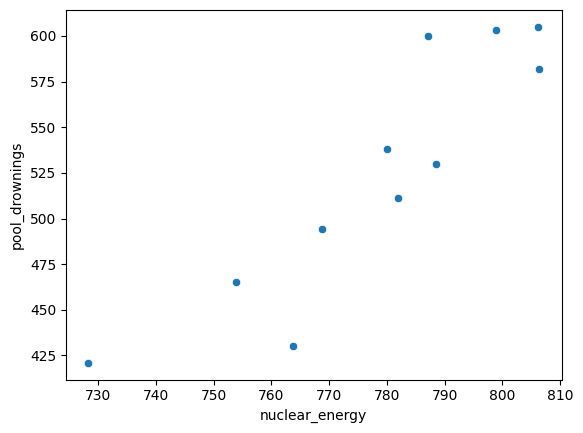

In [14]:
sns.scatterplot(x="nuclear_energy", y="pool_drownings", data=weird_df)

##### Instructions 3/4

* Print out the correlation matrix of `weird_df`.

In [15]:
weird_df.corr()

,pool_drownings,nuclear_energy
pool_drownings,1.000000,0.901179
nuclear_energy,0.901179,1.000000


##### Instructions 4/4

**Question**

What can you conclude from the strong correlation (r=0.9) between these features?

**Possible answers**

1. If the nuclear energy production increases next year I'd better not go swimming.
2. You could bring the nuclear energy production down by increasing pool safety.
3. To build a Uranium usage forecaster, I should use pool drownings or nuclear energy production as features but not both.
4. Not much, correlation does not imply causation.

**Answer**

4. Not much, correlation does not imply causation.